In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings
from datetime import date, datetime

import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.metrics import sensitivity_specificity_support
from sklearn.svm import SVC

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
pd.set_option('display.float_format', lambda x : '%.4f' % x)

In [2]:
df = pd.read_csv("telecom_churn_data.csv")
df.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.3850,214.8160,213.8030,21.1000,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,NaN,NaN,0.1600,NaN,NaN,NaN,4.1300,NaN,NaN,NaN,1.1500,NaN,NaN,NaN,5.4400,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000

### Understanding the data - Describe, Info and Null Values

In [3]:
df.describe(percentiles = [0.25,0.5,0.7,0.95,0.99]).transpose()

,count,mean,std,min,25%,50%,70%,95%,99%,max
mobile_number,99999.0000,7001207270.3875,695669.3863,7000000074.0000,7000606232.5000,7001204632.0000,7001690473.4000,7002290808.8000,7002387118.3800,7002410905.0000
circle_id,99999.0000,109.0000,0.0000,109.0000,109.0000,109.0000,109.0000,109.0000,109.0000,109.0000
loc_og_t2o_mou,98981.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
std_og_t2o_mou,98981.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
loc_ic_t2o_mou,98981.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
arpu_6,99999.0000,282.9874,328.4398,-2258.7090,93.4115,197.7040,324.8394,829.4882,1410.7925,27731.0880
arpu_7,99999.0000,278.5366,338.1563,-2014.0450,86.9805,191.6400,317.9104,828.3572,1428.6859,35145.8340
arpu_8,99999.0000,279.1547,344.4748,-945.8080,84.1260,192.0800,322.1346,833.3033,1455.5400,33543.6240
arpu_9,99999.0000,261.6451,341.9986,-1899.5050,62.6850,176.8490,305.9684,805.1072,1402.4457,38805.6170
onnet_mou_6,96062.0000,132.3959,297.2074,0.0000,7.3800,34.3100,91.0900,612.4075,1431.7605,7376.7100


In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
round((df.isnull().sum().sort_values(ascending = False)/len(df))*100,2)

arpu_3g_6                  74.8500
night_pck_user_6           74.8500
total_rech_data_6          74.8500
arpu_2g_6                  74.8500
max_rech_data_6            74.8500
fb_user_6                  74.8500
av_rech_amt_data_6         74.8500
date_of_last_rech_data_6   74.8500
count_rech_2g_6            74.8500
count_rech_3g_6            74.8500
date_of_last_rech_data_7   74.4300
total_rech_data_7          74.4300
fb_user_7                  74.4300
max_rech_data_7            74.4300
night_pck_user_7           74.4300
count_rech_2g_7            74.4300
av_rech_amt_data_7         74.4300
arpu_2g_7                  74.4300
count_rech_3g_7            74.4300
arpu_3g_7                  74.4300
total_rech_data_9          74.0800
count_rech_3g_9            74.0800
fb_user_9                  74.0800
max_rech_data_9            74.0800
arpu_3g_9                  74.0800
date_of_last_rech_data_9   74.0800
night_pck_user_9           74.0800
arpu_2g_9                  74.0800
count_rech_2g_9     

In [6]:
# Renaming columns to maintain consistency

df = df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7','aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [7]:
# create backup of data
df_copy = df.copy()

In [8]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [9]:
# look at missing value ratio in each column
round((df.isnull().sum().sort_values(ascending = False)/len(df))*100,2)

arpu_3g_6                  74.8500
night_pck_user_6           74.8500
total_rech_data_6          74.8500
arpu_2g_6                  74.8500
max_rech_data_6            74.8500
fb_user_6                  74.8500
av_rech_amt_data_6         74.8500
date_of_last_rech_data_6   74.8500
count_rech_2g_6            74.8500
count_rech_3g_6            74.8500
date_of_last_rech_data_7   74.4300
total_rech_data_7          74.4300
fb_user_7                  74.4300
max_rech_data_7            74.4300
night_pck_user_7           74.4300
count_rech_2g_7            74.4300
av_rech_amt_data_7         74.4300
arpu_2g_7                  74.4300
count_rech_3g_7            74.4300
arpu_3g_7                  74.4300
total_rech_data_9          74.0800
count_rech_3g_9            74.0800
fb_user_9                  74.0800
max_rech_data_9            74.0800
arpu_3g_9                  74.0800
date_of_last_rech_data_9   74.0800
night_pck_user_9           74.0800
arpu_2g_9                  74.0800
count_rech_2g_9     

### Treatment of missing Values

We will look at some of the missing values to see if there is any pattern which can help us decide if we should drop them, impute them or if we can derive some other features and drop the base columns

In [10]:
# Checking the data with missing value for one of the columns for the 8th month (Action phase)

df[df['loc_ic_t2t_mou_8'].isna()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
35,7002108620,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,596.3760,13.4480,0.0000,0.0000,10.5100,NaN,NaN,NaN,199.7400,NaN,NaN,NaN,196.4900,NaN,NaN,NaN,198.0600,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,2.5000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,2.5000,NaN,NaN,NaN,9.7000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,9.7000,NaN,NaN,NaN,0.0300,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,12.2300,0.0000,0.0000,0.0000,0.0000,NaN,NaN,NaN,0.4300,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.4300,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,7.9600,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,7.9600,NaN,NaN,Na

In [11]:
# Checking the data with missing value for one of the columns for the 7th month (Good phase)

df[df['av_rech_amt_data_7'].isna()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
2,7001625959,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.6900,189.0580,210.2260,290.7140,11.5400,55.2400,37.2600,74.8100,143.3300,220.5900,208.3600,118.9100,0.0000,0.0000,0.0000,38.4900,0.0000,0.0000,0.0000,70.9400,7.1900,28.7400,13.5800,14.3900,29.3400,16.8600,38.4600,28.1600,24.1100,21.7900,15.6100,22.2400,0.0000,135.5400,45.7600,0.4800,60.6600,67.4100,67.6600,64.8100,4.3400,26.4900,22.5800,8.7600,41.8100,67.4100,75.5300,9.2800,1.4800,14.7600,22.8300,0.0000,0.0000,0.0000,0.0000,0.0000,47.6400,108.6800,120.9400,18.0400,0.0000,0.0000,0.0000,0.0000,46.5600,236.8400,96.8400,42.0800,0.4500,0.0000,0.0000,0.000

In [12]:
# Checking the data with missing value for one of the columns for the 6th month (Good phase)

df[df['count_rech_3g_6'].isna()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
1,7001865778,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.0470,355.0740,268.3210,86.2850,24.1100,78.6800,7.6800,18.3400,15.7400,99.8400,304.7600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.8800,74.5600,7.6800,18.3400,11.5100,75.9400,291.8600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,2.9100,0.0000,0.0000,35.3900,150.5100,299.5400,72.1100,0.2300,4.1100,0.0000,0.0000,0.0000,0.4600,0.1300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2300,4.5800,0.1300,0.0000,0.0000,0.0000,0.0000,0.0000,4.6800,23.4300,12.7600,0.0000,0.0000,0.0000,0.0000,0.0000,40.3100,178.5300,312.4400,

##### Based on the above null values, we can see a clear pattern. These are:

1. For every recharge recorded, the amount has been recoreded too. So there are no records which do not have amounts unrecorded
2. There are no records with 0 recharge. It is safe to assume that null values represent 0 recharges and hence 0 amount
3. For the null values in 'loc_ic_t2t_mou_8', all other relevant columns are also Null. This would mean that either the data was not captured for all the columns or we can simply impute them using some of the imputing techniques
4. For the categorical missing data, we can impute the data with '-1'. This will be a new category which we will introduce indicating the missing data
5. arpu_2g and arpu_3g have a lot of missing values. This can be either because the the values were not recorded or because the mobile phone used by that number for that month may not have supported data packs or because they may not have any packs installed. We will impute this column with '0' to show that the 2g and 3g packs were not used


#### Imputing Date Columns First

In [13]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.0000,25571.0000,26339.0000,25922.0000,25153.0000,25571.0000,26339.0000,25922.0000,25153.0000,25571.0000,26339.0000,25922.0000,25153.0000,25571.0000,26339.0000,25922.0000,25153.0000,25571.0000,26339.0000,25922.0000
mean,2.4638,2.6664,2.6520,2.4412,1.8647,2.0447,2.0163,1.7818,0.5991,0.6217,0.6357,0.6594,126.3934,126.7295,125.7173,124.9414,192.6010,200.9813,197.5265,192.7343
std,2.7891,3.0316,3.0750,2.5163,2.5703,2.7683,2.7201,2.2147,1.2744,1.3945,1.4228,1.4115,108.4772,109.7653,109.4379,111.3638,192.6463,196.7912,191.3013,188.4003
min,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5000,0.5000,1.0000
25%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,25.0000,25.0000,25.0000,25.0000,82.0000,92.0000,87.0000,69.0000
50%,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,145.0000,145.0000,145.0000,145.0000,154.0000,154.0000,154.0000,164.0000
75%,3.0000,3.0000,3.0000,3.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,177.0000,177.0000,179.0000,179.0000,252.0000,252.0000,252.0000,252.0000
max,61.0000,54.0000,60.0000,84.0000,42.0000,48.0000,44.0000,40.0000,29.0000,35.0000,45.0000,49.0000,1555.0000,1555.0000,1555.0000,1555.0000,7546.0000,4365.0000,4076.0000,4061.0000


In [14]:
# Recharge columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9','arpu_2g_6',
                 'arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_8','arpu_3g_8','arpu_2g_9','arpu_3g_9']

df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [15]:
# Imputing the categorical columns with -1

df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [16]:
# Dropping the date cols

df = df.drop(date_cols, axis=1)

# After some analysis, we saw that count_rech and total_rech fulfil the same information. We can drop count_rech column
count_cols = ['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8',
              'count_rech_3g_8','count_rech_2g_9','count_rech_3g_9']
df = df.drop(count_cols, axis = 1)

In [17]:
# look at missing value ratio in each column
round((df.isnull().sum().sort_values(ascending = False)/len(df))*100,2)

spl_og_mou_9         7.7500
loc_og_t2t_mou_9     7.7500
std_og_t2f_mou_9     7.7500
loc_ic_mou_9         7.7500
loc_ic_t2m_mou_9     7.7500
roam_og_mou_9        7.7500
std_ic_t2f_mou_9     7.7500
std_og_t2m_mou_9     7.7500
std_ic_t2m_mou_9     7.7500
loc_ic_t2t_mou_9     7.7500
std_og_t2t_mou_9     7.7500
loc_og_t2m_mou_9     7.7500
std_ic_t2t_mou_9     7.7500
loc_ic_t2f_mou_9     7.7500
loc_og_t2f_mou_9     7.7500
loc_og_mou_9         7.7500
std_ic_t2o_mou_9     7.7500
roam_ic_mou_9        7.7500
offnet_mou_9         7.7500
og_others_9          7.7500
ic_others_9          7.7500
isd_og_mou_9         7.7500
isd_ic_mou_9         7.7500
std_og_mou_9         7.7500
spl_ic_mou_9         7.7500
loc_og_t2c_mou_9     7.7500
onnet_mou_9          7.7500
std_ic_mou_9         7.7500
std_og_t2c_mou_9     7.7500
loc_ic_t2t_mou_8     5.3800
std_og_t2m_mou_8     5.3800
std_og_mou_8         5.3800
std_og_t2c_mou_8     5.3800
og_others_8          5.3800
std_og_t2t_mou_8     5.3800
loc_ic_t2m_mou_8    

## Impute the remaining data using fancy Impute MICE

In [18]:
df_cols = df.columns

# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer as MICE
df_imputed = MICE().fit_transform(df)

In [19]:
# convert imputed numpy array to pandas dataframe
df = pd.DataFrame(df_imputed, columns = df_cols)
print(round((df.isnull().sum().sort_values(ascending = False)/len(df))*100,2))

mobile_number        0.0000
max_rech_amt_6       0.0000
ic_others_8          0.0000
ic_others_9          0.0000
total_rech_num_6     0.0000
total_rech_num_7     0.0000
total_rech_num_8     0.0000
total_rech_num_9     0.0000
total_rech_amt_6     0.0000
total_rech_amt_7     0.0000
total_rech_amt_8     0.0000
total_rech_amt_9     0.0000
max_rech_amt_7       0.0000
ic_others_6          0.0000
max_rech_amt_8       0.0000
max_rech_amt_9       0.0000
last_day_rch_amt_6   0.0000
last_day_rch_amt_7   0.0000
last_day_rch_amt_8   0.0000
last_day_rch_amt_9   0.0000
total_rech_data_6    0.0000
total_rech_data_7    0.0000
total_rech_data_8    0.0000
total_rech_data_9    0.0000
ic_others_7          0.0000
isd_ic_mou_9         0.0000
max_rech_data_7      0.0000
std_ic_mou_8         0.0000
std_ic_t2f_mou_6     0.0000
std_ic_t2f_mou_7     0.0000
std_ic_t2f_mou_8     0.0000
std_ic_t2f_mou_9     0.0000
std_ic_t2o_mou_6     0.0000
std_ic_t2o_mou_7     0.0000
std_ic_t2o_mou_8     0.0000
std_ic_t2o_mou_9    

### Filter High Value Customers 
**We will identify the high value customers based on the recharge amount in the good phase (month 6 and month 7). There are 2 recharge amounts that we see - recharge for calls/sms and recharge for data**

In [20]:
df[['total_rech_data_6','max_rech_data_6','av_rech_amt_data_6','total_rech_data_7',
    'max_rech_data_7','av_rech_amt_data_7']].head(200)

,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
0,1.0000,252.0000,252.0000,1.0000,252.0000,252.0000
1,0.0000,0.0000,0.0000,1.0000,154.0000,154.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1.0000,56.0000,56.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,2.0000,154.0000,177.0000
9,0.0000,0.0000,0.0000,1.0000,154.0000,154.0000


In [21]:
df.loc[(df['max_rech_data_7'] > df['av_rech_amt_data_7']),['total_rech_data_7','max_rech_data_7','av_rech_amt_data_7']]

,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
2529,2.0000,154.0000,77.0000
5447,2.0000,22.0000,11.0000
7860,2.0000,252.0000,126.0000
9961,2.0000,8.0000,4.0000
12431,2.0000,91.0000,45.5000
15436,7.0000,252.0000,231.0000
16385,2.0000,1.0000,0.5000
16993,7.0000,25.0000,20.0000
17108,7.0000,41.0000,33.0000
18495,3.0000,154.0000,85.5000


##### With the above data following thing is clear:
    Avg_rech_amnt_data is greater than the max_rech_data. Hence we can assume that avg_rech_amnt_data represents total data recharge amount

###### We will create a new column with total recharge amount (calls + data) and then find the 70th percentile

In [22]:
df['total_rech_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']+ df['total_rech_amt_6']
df['total_rech_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7'] + df['total_rech_amt_7']
df['total_rech_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8'] + df['total_rech_amt_8']

In [23]:
# High Value Customers - defined as 70th percentile of average recharge amount in the first two months

df["good_rech"] = df[['total_rech_6','total_rech_7']].mean(axis = 1)
df['good_rech'].describe(percentiles =[0.25,0.50,0.70,0.75])

count   99999.0000
mean      485.3281
std       869.4236
min         0.0000
25%       128.0000
50%       275.0000
70%       478.0000
75%       553.0000
max     61236.0000
Name: good_rech, dtype: float64

In [24]:
df = df[df['good_rech'] >= 478] # Based on above numbers, we see 70th percentile is 478. Dropping all records below 70th percentile
df.shape

(30001, 210)

### Derive Churn Column

In [25]:
# Adding Churn value to the data based on the incoming, outgoing and mobile internet usage data

df['Churn'] = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(
    lambda x:1 if ((x['total_ic_mou_9']==0) & (x['total_og_mou_9']==0) & (x['vol_2g_mb_9']==0) & (x['vol_3g_mb_9']==0)) 
    else 0, axis=1)

In [26]:
df["Churn"].value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

Drop all Columns for Sep Month

In [27]:
# Dropping all the churn related attributes from the dataset and then checking the null value

df = df.drop([col for col in df.columns if "_9" in col], axis = 1)
df.shape

(30001, 161)

In [28]:
sweet_report = sv.analyze(df,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# New Variables derivation

##### We will now derive some new features from some of the columns which have limited data

In [29]:
 # Adding up the service packs

df['all_service_6'] = df['monthly_2g_6'] + df['sachet_2g_6'] + df['monthly_3g_6'] + df['sachet_3g_6']
df['all_service_7'] = df['monthly_2g_7'] + df['sachet_2g_7'] + df['monthly_3g_7'] + df['sachet_3g_7']
df['all_service_8'] = df['monthly_2g_8'] + df['sachet_2g_8'] + df['monthly_3g_8'] + df['sachet_3g_8']

In [30]:
# Creating new datasets from existing columns

df['avg_rech_amt_diff'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2 - df['total_rech_amt_8']
df['avg_rech_num_diff'] = (df['total_rech_num_6'] + df['total_rech_num_7'])/2 - df['total_rech_num_8']

df['avg_og_mou_diff'] = (df['total_og_mou_6'] + df['total_og_mou_7'])/2 - df['total_og_mou_8']
df['avg_ic_mou_diff'] = (df['total_ic_mou_6'] + df['total_ic_mou_7'])/2 - df['total_ic_mou_8']

df['max_rech_amt_diff'] = (df['max_rech_amt_6'] + df['max_rech_amt_7'])/2 - df['max_rech_amt_8']

df['good_rech_diff'] = df['good_rech'] - df['total_rech_8']

df['avg_vbc_3g_diff'] = (df['vbc_3g_6'] + df['vbc_3g_7'])/2 - df['vbc_3g_8']

df['arpu_diff'] = (df['arpu_6'] + df['arpu_7'])/2 - df['arpu_8']
df['arpu_data_diff'] = (df['arpu_2g_6'] + df['arpu_3g_6'] + df['arpu_2g_7'] + df['arpu_3g_7'])/4 - (df['arpu_2g_8'] + df['arpu_3g_8'])  

In [31]:
# Creating others category in std for outgoing and incoming

df['std_og_t2o_6'] = df['std_og_t2m_mou_6'] + df['std_og_t2f_mou_6'] + df['std_og_t2c_mou_6']
df['std_og_t2o_7'] = df['std_og_t2m_mou_7'] + df['std_og_t2f_mou_7'] + df['std_og_t2c_mou_7']
df['std_og_t2o_8'] = df['std_og_t2m_mou_8'] + df['std_og_t2f_mou_8'] + df['std_og_t2c_mou_8']

df['std_ic_t2o_6'] = df['std_ic_t2m_mou_6'] + df['std_ic_t2f_mou_6'] + df['std_ic_t2o_mou_6']
df['std_ic_t2o_7'] = df['std_ic_t2m_mou_7'] + df['std_ic_t2f_mou_7'] + df['std_ic_t2o_mou_7']
df['std_ic_t2o_8'] = df['std_ic_t2m_mou_8'] + df['std_ic_t2f_mou_8'] + df['std_ic_t2o_mou_8']

In [32]:
# ISD data has a lot of 0s, we can add them to other outgoing and incoming and Special incoming calls

df['og_others_6'] = df['og_others_6'] + df['isd_og_mou_6'] + df['spl_og_mou_6']
df['og_others_7'] = df['og_others_7'] + df['isd_og_mou_7'] + df['spl_og_mou_6']
df['og_others_8'] = df['og_others_8'] + df['isd_og_mou_8'] + df['spl_og_mou_6']

df['ic_others_6'] = df['ic_others_6'] + df['isd_ic_mou_6'] + df['spl_ic_mou_6']
df['ic_others_7'] = df['ic_others_7'] + df['isd_ic_mou_7'] + df['spl_ic_mou_7']
df['ic_others_8'] = df['ic_others_8'] + df['isd_ic_mou_8'] + df['spl_ic_mou_8']

In [33]:
# Combining the roaming data. Since data is from 2014, the roaming charges would be applied for incoming and outgoing

df['roam_6'] = df['roam_ic_mou_6'] + df['roam_og_mou_6']
df['roam_7'] = df['roam_ic_mou_7'] + df['roam_og_mou_7']
df['roam_8'] = df['roam_ic_mou_8'] + df['roam_og_mou_8']

In [34]:
# Combining arpu data by volume for 2g and 3g data packs

df['arpu_data_6'] = df['arpu_2g_6'] + df['arpu_3g_6']
df['arpu_data_7'] = df['arpu_2g_7'] + df['arpu_3g_7']
df['arpu_data_8'] = df['arpu_2g_8'] + df['arpu_3g_8']

#### Based on the sweeetviz report and the describe function, we see that some of the columns have skewed data. We can drop these columns as they will not help us in prediction

In [35]:
drop_cols = ['monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','sachet_2g_6','sachet_2g_7',
             'sachet_2g_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','std_og_t2m_mou_6',
             'std_og_t2m_mou_7','std_og_t2m_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
             'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7',
             'std_ic_t2f_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_ic_mou_6','isd_ic_mou_7',
             'isd_ic_mou_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_amt_6',
             'total_rech_amt_7','total_rech_amt_8',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
             'max_rech_data_6','max_rech_data_7','max_rech_data_8','circle_id','loc_og_t2o_mou','std_og_t2o_mou',
             'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
             'std_ic_t2o_mou_7','std_ic_t2o_mou_8','arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_8','arpu_3g_8']


In [36]:
df = df.drop(drop_cols, axis =1) # Dropping 11 columns which have non value add data
df.shape

(30001, 124)

In [37]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99]).transpose().sort_index()

,count,mean,std,min,25%,50%,75%,90%,99%,max
Churn,30001.0000,0.0814,0.2734,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
all_service_6,30001.0000,1.6677,2.8312,0.0000,0.0000,1.0000,2.0000,5.0000,13.0000,61.0000
all_service_7,30001.0000,1.8538,3.0918,0.0000,0.0000,1.0000,2.0000,5.0000,14.0000,54.0000
all_service_8,30001.0000,1.6219,2.9960,0.0000,0.0000,1.0000,2.0000,5.0000,13.0000,60.0000
aon,30001.0000,1209.3688,957.6780,180.0000,460.0000,846.0000,1756.0000,2793.0000,3651.0000,4321.0000
arpu_6,30001.0000,558.4908,460.6405,-2258.7090,309.8650,481.6940,699.9430,994.0990,1985.1150,27731.0880
arpu_7,30001.0000,560.7822,479.7769,-2014.0450,309.8260,480.9430,698.3150,995.8590,1999.5000,35145.8340
arpu_8,30001.0000,508.5980,501.9620,-945.8080,231.4730,427.5850,661.4910,977.3450,1986.6220,33543.6240
arpu_data_6,30001.0000,130.4470,335.0494,-30.2800,0.0000,0.0000,86.9700,430.0700,1461.9900,12796.0400
arpu_data_7,30001.0000,133.3228,342.8524,-26.0400,0.0000,0.0000,85.3200,430.0400,1556.0100,9790.2600


In [38]:
# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col in df.columns]
cat_cols.append('Churn')
num_cols = [col for col in df.columns if col not in cat_cols]

In [39]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'Churn']

In [40]:
# change columns types

df[num_cols] = df[num_cols].apply(pd.to_numeric)
df[cat_cols] = df[cat_cols].apply(lambda column: column.astype("category"), axis=0)

## Univariate Analysis

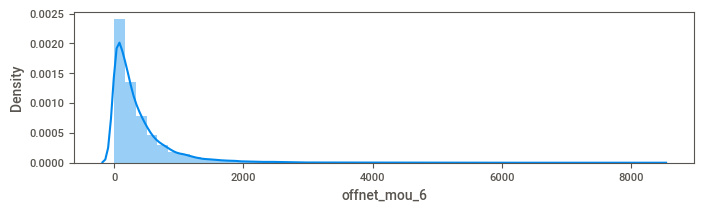

In [41]:
plt.figure(figsize = (8,2))
sns.distplot(df['offnet_mou_6']);

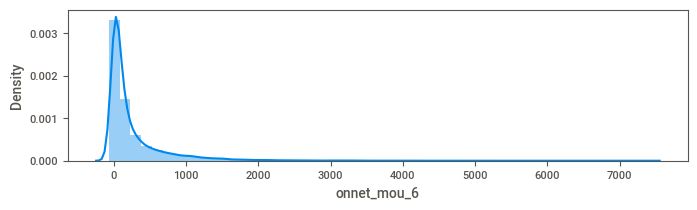

In [42]:
plt.figure(figsize = (8,2))
sns.distplot(df['onnet_mou_6']);

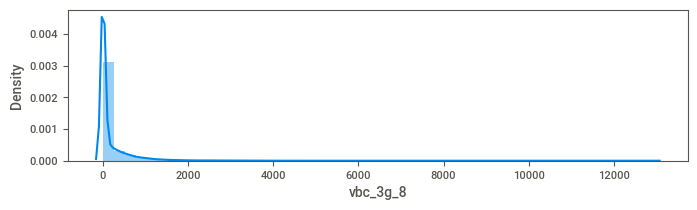

In [43]:
plt.figure(figsize = (8,2))
sns.distplot(df['vbc_3g_8']);

## Bivariate Analysis

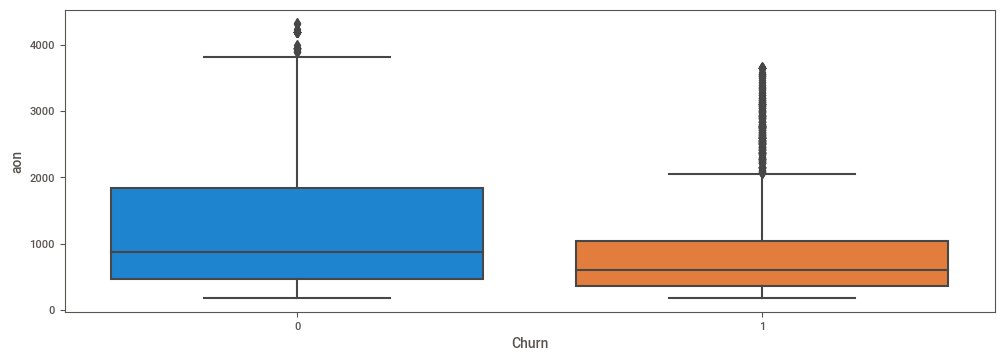

In [44]:
plt.figure(figsize = (12,4))
sns.boxplot(df['Churn'], df['aon']);

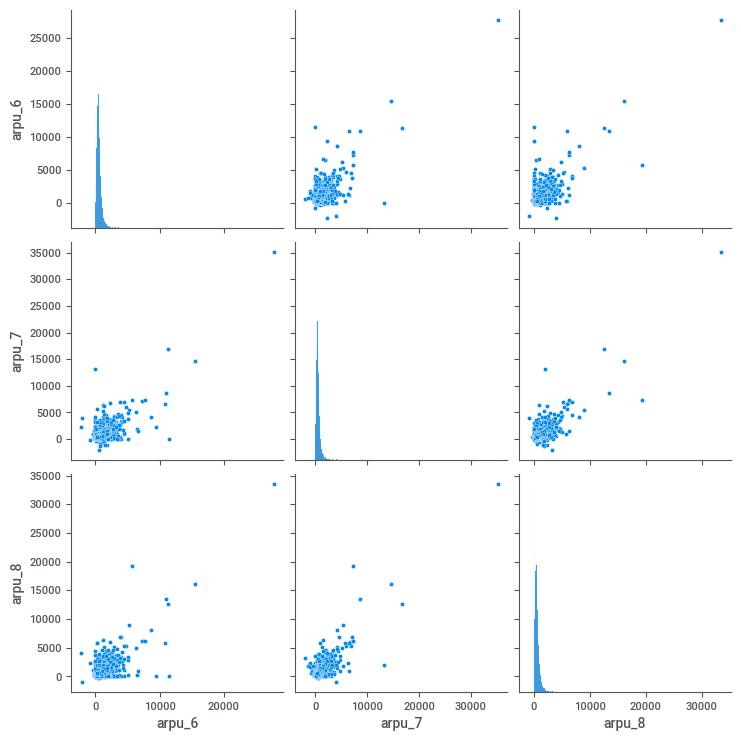

In [45]:
t1 = df[['arpu_6','arpu_7', 'arpu_8', 'Churn']]
sns.pairplot(t1);

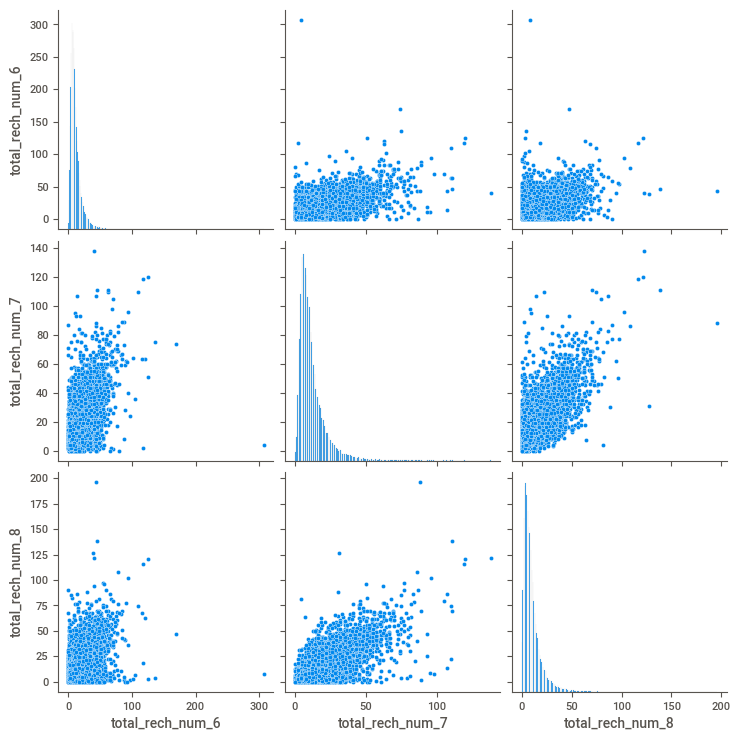

In [46]:
t1 = df[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 'Churn']]
sns.pairplot(t1);

<Figure size 1200x200 with 0 Axes>

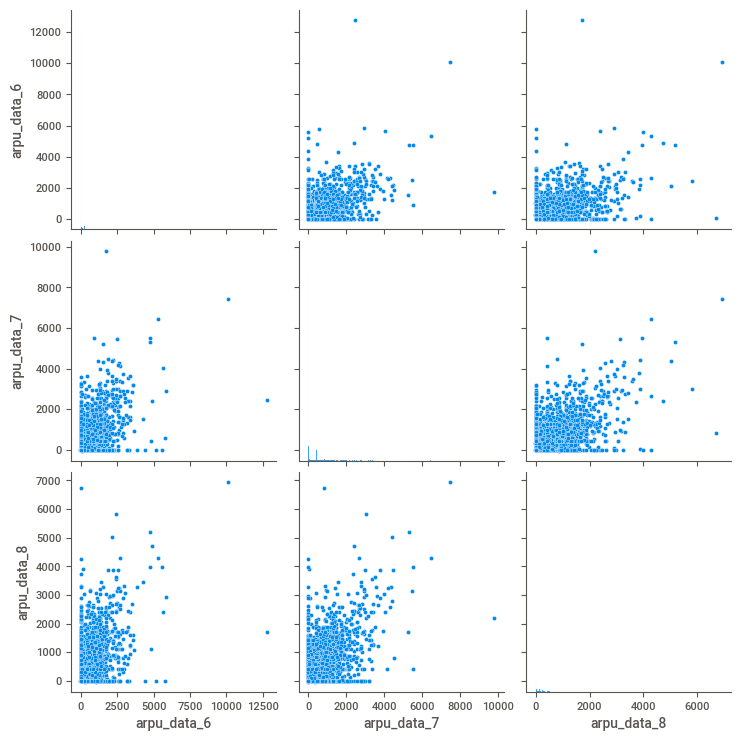

In [47]:
plt.figure(figsize = (12,2))
t1 = df[['arpu_data_6','arpu_data_7', 'arpu_data_8', 'Churn']]
sns.pairplot(t1);

## Outlier Treatment

In [48]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [49]:
# cap outliers in the numeric columns
df[num_cols] = df[num_cols].apply(cap_outliers, axis=0)

In [50]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,99%,max
mobile_number,30001.0000,7001206159.5591,690878.4173,7000000074.0000,7000609293.0000,7001203434.0000,7001803773.0000,7002165290.0000,7002385520.0000,7002410905.0000
arpu_6,30001.0000,548.1904,356.6180,-823.4306,309.8650,481.6940,699.9430,994.0990,1940.4122,1940.4122
arpu_7,30001.0000,550.8146,361.1208,-878.5486,309.8260,480.9430,698.3150,995.8590,1999.5000,2000.1130
arpu_8,30001.0000,498.4412,384.4933,-945.8080,231.4730,427.5850,661.4910,977.3450,1986.6220,2014.4839
onnet_mou_6,30001.0000,243.7095,372.2645,-67.6630,17.0900,84.5800,290.4400,754.1600,1640.4272,1640.4272
onnet_mou_7,30001.0000,250.9434,387.8367,-314.6728,16.0300,82.8100,290.2400,784.4800,1708.0343,1708.0343
onnet_mou_8,30001.0000,214.9166,355.9382,-507.1641,10.4100,65.6100,239.9600,665.0800,1610.6428,1610.6428
offnet_mou_6,30001.0000,362.0036,402.8228,0.0000,80.7100,222.5400,487.9400,895.8300,1818.6974,1818.6974
offnet_mou_7,30001.0000,365.1492,411.2874,0.0000,78.5400,220.0300,494.0100,916.0800,1872.4947,1872.4947
offnet_mou_8,30001.0000,326.1596,382.1585,0.0000,63.1900,182.8300,438.8900,823.6800,1777.3783,1777.3783


In [51]:
# change churn to numeric
df['Churn'] = pd.to_numeric(df['Churn'])

In [52]:
# divide data into train and test
X = df.drop("Churn", axis = 1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 123)
(24000,)
(6001, 123)
(6001,)


In [54]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').Churn.mean()
train.groupby('night_pck_user_7').Churn.mean()
train.groupby('night_pck_user_8').Churn.mean()
train.groupby('fb_user_6').Churn.mean()
train.groupby('fb_user_7').Churn.mean()
train.groupby('fb_user_8').Churn.mean()

night_pck_user_6
-1.0   0.0992
0.0    0.0666
1.0    0.0945
Name: Churn, dtype: float64

night_pck_user_7
-1.0   0.1162
0.0    0.0550
1.0    0.0537
Name: Churn, dtype: float64

night_pck_user_8
-1.0   0.1410
0.0    0.0293
1.0    0.0255
Name: Churn, dtype: float64

fb_user_6
-1.0   0.0992
0.0    0.0673
1.0    0.0673
Name: Churn, dtype: float64

fb_user_7
-1.0   0.1162
0.0    0.0615
1.0    0.0545
Name: Churn, dtype: float64

fb_user_8
-1.0   0.1410
0.0    0.0694
1.0    0.0246
Name: Churn, dtype: float64

In [55]:
mapping = {'night_pck_user_6' : {-1: 0.0992, 0: 0.0666, 1: 0.0945},
           'night_pck_user_7' : {-1: 0.1162, 0: 0.0550, 1: 0.0537},
           'night_pck_user_8' : {-1: 0.1410, 0: 0.0293, 1: 0.0255},
           'fb_user_6'        : {-1: 0.0992, 0: 0.0673, 1: 0.0673},
           'fb_user_7'        : {-1: 0.1162, 0: 0.0615, 1: 0.0545},
           'fb_user_8'        : {-1: 0.1410, 0: 0.0694, 1: 0.0246}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [56]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['Churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 65954 to 7773
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  24000 non-null  float64
 1   night_pck_user_7  24000 non-null  float64
 2   night_pck_user_8  24000 non-null  float64
 3   fb_user_6         24000 non-null  float64
 4   fb_user_7         24000 non-null  float64
 5   fb_user_8         24000 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB


In [57]:
df.corr()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_6,total_rech_7,total_rech_8,good_rech,Churn,all_service_6,all_service_7,all_service_8,avg_rech_amt_diff,avg_rech_num_diff,avg_og_mou_diff,avg_ic_mou_diff,max_rech_amt_diff,good_rech_diff,avg_vbc_3g_diff,arpu_diff,arpu_data_diff,std_og_t2o_6,std_og_t2o_7,std_og_t2o_8,std_ic_t2o_6,std_ic_t2o_7,std_ic_t2o_8,roam_6,roam_7,roam_8,arpu_data_6,arpu_data_7,arpu_data_8
mobile_number,1.0000,0.0418,0.0384,0.0465,0.0133,0.0092,0.0142,0.0252,0.0145,0.0256,0.0130,0.0037,0.0080,0.0078,0.0077,0.0072,0.0706,0.0681,0.0676,0.0939,0.0890,0.0905,0.0814,0.0785,0.0805,-0.0016,0.0003,0.0103,0.0992,0.0964,0.0963,-0.0190,-0.0209,-0.0167,-0.0312,-0.0366,-0.0285,0.0020,0.0080,0.0114,0.0246,0.0151,0.0253,0.0556,0.0526,0.0583,0.0842,0.0742,0.0758,0.0773,0.0787,0.0788,0.0891,0.0824,0.0846,-0.0070,-0.0013,-0.0110,-0.0066,-0.0060,-0.0065,0.0750,0.0677,0.0699,0.0232,0.0199,0.0221,-0.0330,-0.0459,-0.0373,0.0702,0.0718,0.0762,0.0558,0.0589,0.0582,-0.0146,-0.0118,-0.0012,-0.0150,-0.0144,-0.0173,-0.0227,-0.0121,-0.0066,0.3158,-0.0331,-0.0360,-0.0467,-0.0119,-0.0122,-0.0002,-0.0145,-0.0301,-0.0472,-0.0446,-0.0310,-0.0071,-0.0025,-0.0035,0.0019,-0.0047,-0.0143,-0.0093,-0.0120,-0.0136,-0.0328,-0.0375,-0.0312,-0.0056,-0.0108,-0.0109,0.0111,0.0058,0.0062,0.0012,0.0045,0.0106
arpu_6,0.0418,1.0000,0.5925,0.5059,0.4255,0.2749,0.2390,0.5957,0.3976,0.3562,0.1444,0.1243,0.1359,0.1983,0.1587,0.1611,0.2713,0.2179,0.2035,0.4146,0.3205,0.2912,0.1982,0.1644,0.1563,0.1012,0.0138,0.0072,0.4348,0.3371,0.3001,0.3141,0.1909,0.1640,0.4578,0.2766,0.2311,0.2636,0.1675,0.1218,0.6627,0.4323,0.3661,0.1776,0.1447,0.1355,0.2613,0.2100,0.1834,0.0874,0.0756,0.0697,0.2659,0.2085,0.1811,0.1692,0.1210,0.1120,0.2183,0.1483,0.1322,0.3109,0.2320,0.2008,0.1336,0.0738,0.0604,0.4192,0.1552,0.1315,0.3499,0.2268,0.2537,0.2691,0.1713,0.1904,0.0550,-0.0992,-0.0248,-0.1046,-0.1572,-0.1246,0.1229,0.0310,0.0492,0.0583,0.0372,0.0358,0.0969,0.4595,0.1534,0.1805,0.3461,0.0739,-0.1622,-0.2531,-0.1792,0.2741,0.2141,0.2713,0.1165,0.0428,0.1170,0.0445,0.3108,-0.0401,0.3605,0.2232,0.1922,0.1846,0.1288,0.1182,0.1826,0.1500,0.1572,0.2115,0.0815,0.1143
arpu_7,0.0384,0.5925,1.0000,0.6934,0.2796,0.4178,0.3585,0.4064,0.5781,0.4808,0.1306,0.1407,0.1263,0.1572,0.1886,0.1869,0.1890,0.2687,0.2357,0.2833,0.3868,0.3278,0.1615,0.1965,0.1694,0.0236,0.1087,0.0935,0.2971,0.4182,0.3565,0.2034,0.3137,0.2655,0.2997,0.4648,0.3793,0.1258,0.2159,0.1869,0.4372,0.6542,0.5313,0.1164,0.1735,0.1536,0.1722,0.2462,0.2066,0.0603,0.0792,0.0670,0.1725,0.2521,0.2173,0.1286,0.1682,0.1463,0.1565,0.2193,0.1966,0.2028,0.2993,0.2592,0.0724,0.1240,0.1182,0.1942,0.3761,0.2685,0.2326,0.3645,0.3468,0.2139,0.2849,0.2481,-0.0880,0.0641,0.0205,-0.1518,-0.0987,-0.0927,0.0299,0.1293,0.0950,0.0

## Modeling

We will start with **PCA** analysis

In [58]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [59]:
pca.fit(X_train)
df_pca = pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

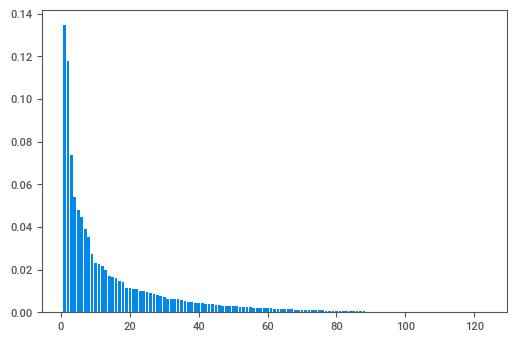

In [60]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_);

#### Skree Plot

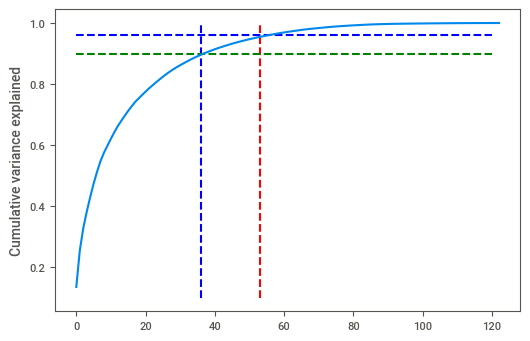

In [61]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x = 53, ymax=1, ymin=0.1, colors="r", linestyles="--")
plt.vlines(x = 36, ymax=1, ymin=0.1, colors="b", linestyles="--")

plt.hlines(y = 0.96, xmax=120, xmin=0, colors="b", linestyles="--")
plt.hlines(y = 0.90, xmax=120, xmin=0, colors="g", linestyles="--")

plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained");

In [62]:
# Final Data from PCA

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=53))])

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Model 1: Logistic Regression

In [65]:
#instantiate model and use Cross_Val_Score to get the scoring

logreg = LogisticRegression(random_state = 42, class_weight = 'balanced')
cross_val_score(logreg, X_train_pca, y_train, cv = 4, scoring = 'recall')

array([0.78688525, 0.81967213, 0.79918033, 0.80981595])

In [66]:
# Fit model and preidct the values for Test Data

logreg.fit(X_train_pca, y_train)

rec = recall_score(y_test, logreg.predict(X_test_pca))
prec = precision_score(y_test, logreg.predict(X_test_pca))

print("Recall is: ",rec)
print("Precision is: ",prec)

LogisticRegression(class_weight='balanced', random_state=42)

Recall is:  0.8176229508196722
Precision is:  0.3112324492979719


In [67]:
results = pd.DataFrame({'Method':['LogisticRegression'], 'Recall':[rec], 'Precision':[prec]})
results

,Method,Recall,Precision
0,LogisticRegression,0.8176,0.3112


In [68]:
# predict churn on test data
y_pred = logreg.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = logreg.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4630  883]
 [  89  399]]
Sensitivity: 	0.82
Specificity: 	0.84
AUC:    	 0.9


## Model 2: Decision Tree Model

In [69]:
dt = DecisionTreeClassifier(random_state=42, class_weight= 'balanced')

In [70]:
%%time
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [ 10, 20, 50, 100, 150,200,250]
}

grid_dt = GridSearchCV(dt,param_grid,cv=4, scoring='recall',n_jobs=-1,return_train_score=True, verbose=1)

grid_dt.fit(X_train_pca, y_train)

Fitting 4 folds for each of 35 candidates, totalling 140 fits
Wall time: 12.5 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [10, 20, 50, 100, 150, 200, 250]},
             return_train_score=True, scoring='recall', verbose=1)

In [71]:
results_dt = pd.DataFrame(grid_dt.cv_results_)[['rank_test_score','param_max_depth','param_min_samples_leaf',
                                       'mean_train_score','mean_test_score']].sort_values('rank_test_score')

<AxesSubplot:xlabel='param_min_samples_leaf'>

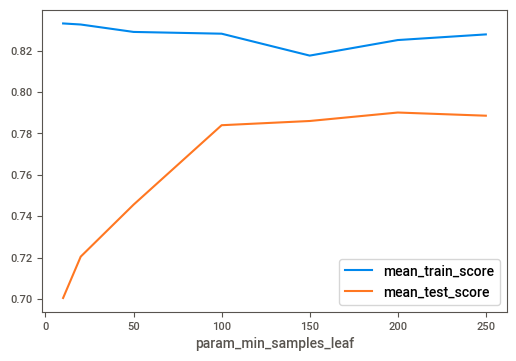

In [72]:
results_dt.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].median().plot()
plt.show()

<AxesSubplot:xlabel='param_max_depth'>

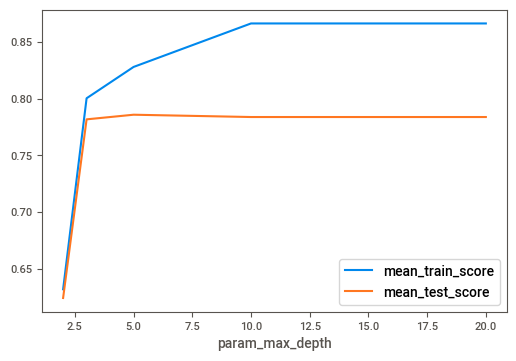

In [73]:
results_dt.groupby('param_max_depth')['mean_train_score','mean_test_score'].median().plot()
plt.show()

In [74]:
dt=DecisionTreeClassifier(random_state=42, class_weight= 'balanced',max_depth = 5, min_samples_leaf=200)
dt.fit(X_train_pca, y_train)
rec = recall_score(y_test, dt.predict(X_test_pca))
prec = precision_score(y_test, dt.predict(X_test_pca))
results.loc[len(results)] = ['DecisionTreeClassifier',rec,prec]
results

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=200, random_state=42)

,Method,Recall,Precision
0,LogisticRegression,0.8176,0.3112
1,DecisionTreeClassifier,0.7807,0.2601


## Model 3: Random Forest

In [75]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')

# hyperparameter space
params = {"criterion": ['gini', 'entropy'],
          'max_depth': [2,5,10,20],
          'min_samples_leaf':[10,50,100,200],
          'n_estimators': [10,50,100,150]
         }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator = rf, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1, return_train_score=True)

In [76]:
# fit model

model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'n_estimators': [10, 50, 100, 150]},
             return_train_score=True, scoring='recall', verbose=1)

In [77]:
# print best hyperparameters
results_rf = pd.DataFrame(model.cv_results_)[['rank_test_score','param_max_depth','param_min_samples_leaf',
                                                'param_n_estimators','mean_train_score','mean_test_score']]

<AxesSubplot:xlabel='param_max_depth'>

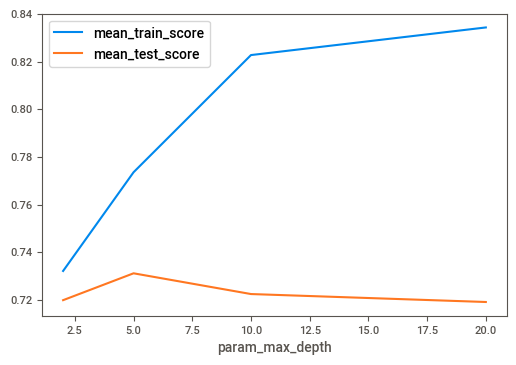

In [78]:
results_rf.groupby('param_max_depth')['mean_train_score','mean_test_score'].median().plot()
plt.show()

<AxesSubplot:xlabel='param_min_samples_leaf'>

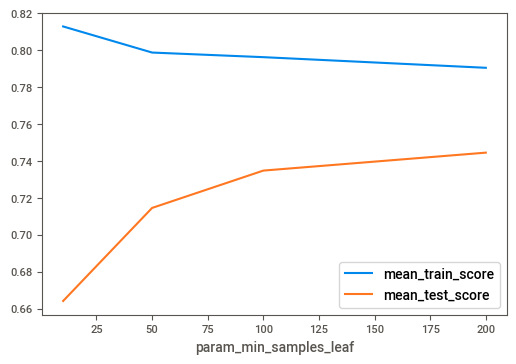

In [79]:
results_rf.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].median().plot()
plt.show()

<AxesSubplot:xlabel='param_n_estimators'>

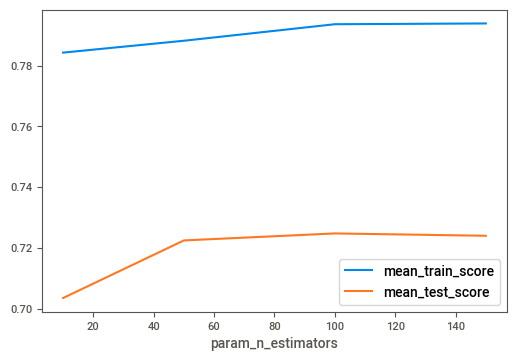

In [80]:
results_rf.groupby('param_n_estimators')['mean_train_score','mean_test_score'].median().plot()
plt.show()

In [81]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=200, n_estimators=100,
                            random_state=42, class_weight = 'balanced')

rf.fit(X_train_pca, y_train)
rec = recall_score(y_test, rf.predict(X_test_pca))
prec = precision_score(y_test, rf.predict(X_test_pca))
results.loc[len(results)] = ['RadomForestClassifier',rec,prec]
results

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=200, random_state=42)

,Method,Recall,Precision
0,LogisticRegression,0.8176,0.3112
1,DecisionTreeClassifier,0.7807,0.2601
2,RadomForestClassifier,0.7336,0.3365


## Model 4: Support Vector Classifier

In [82]:
svm = SVC(random_state=42, class_weight = 'balanced')

In [83]:
param_grid= {
    'gamma': [0.1,0.01,0.001], 
     'C': [10, 100, 200]
}

grid_svm = GridSearchCV(svm, param_grid,cv=4, scoring='recall',n_jobs=-1, return_train_score=True, verbose=1)

grid_svm.fit(X_train_pca, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [10, 100, 200], 'gamma': [0.1, 0.01, 0.001]},
             return_train_score=True, scoring='recall', verbose=1)

In [84]:
results_svm = pd.DataFrame(grid_svm.cv_results_)[['rank_test_score','param_gamma','param_C',
                                                  'mean_train_score','mean_test_score']]

<AxesSubplot:xlabel='param_gamma'>

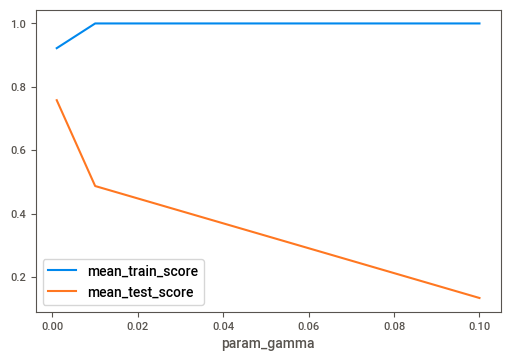

In [85]:
results_svm.groupby('param_gamma')['mean_train_score','mean_test_score'].median().plot()
plt.show()

<AxesSubplot:xlabel='param_C'>

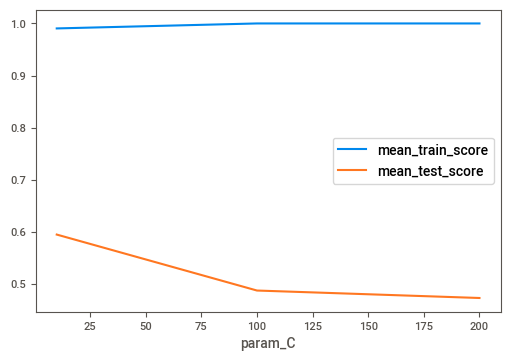

In [86]:
results_svm.groupby('param_C')['mean_train_score','mean_test_score'].median().plot()
plt.show()

In [87]:
grid_svm.best_estimator_, grid_svm.best_score_

(SVC(C=10, class_weight='balanced', gamma=0.001, random_state=42),
 0.7946796741426129)

In [88]:
svm= SVC(C=10, class_weight='balanced', gamma=0.001, random_state=42)
svm.fit(X_train_pca, y_train)
rec = recall_score(y_test, svm.predict(X_test_pca))
prec = precision_score(y_test, svm.predict(X_test_pca))
results.loc[len(results)] = ['SupportVectorClassifier ',rec,prec]
results

SVC(C=10, class_weight='balanced', gamma=0.001, random_state=42)

,Method,Recall,Precision
0,LogisticRegression,0.8176,0.3112
1,DecisionTreeClassifier,0.7807,0.2601
2,RadomForestClassifier,0.7336,0.3365
3,SupportVectorClassifier,0.8053,0.3732


## Choosing best features

In [89]:
# run a random forest model on train data

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, 
                                  class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

11


In [90]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [91]:
# OOB score
rf_model.oob_score_

0.9441666666666667

In [92]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5460   53]
 [ 288  200]]
Sensitivity: 	0.41
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [93]:
# predictors
features = df.drop('Churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,roam_og_mou_8,5.2412
1,total_ic_mou_8,4.8358
2,loc_og_mou_8,4.3170
3,roam_8,4.1551
4,loc_ic_mou_8,4.0679
5,roam_ic_mou_8,3.4268
6,last_day_rch_amt_8,3.3555
7,total_og_mou_8,3.1684
8,total_rech_8,3.1145
9,arpu_8,2.5503


## Extracting top 20

In [94]:
# extract top 'n' features
top_n = 20
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

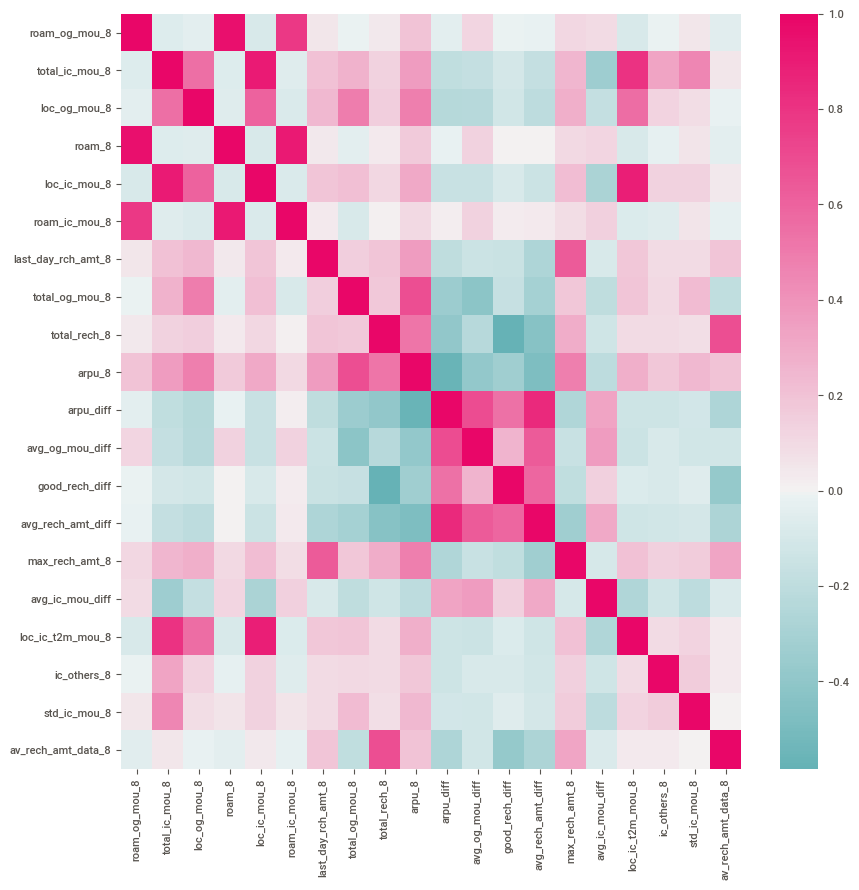

In [95]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [96]:
top_features = ['roam_og_mou_8', 'total_ic_mou_8', 'loc_ic_mou_8', 'last_day_rch_amt_8','arpu_8','avg_rech_amt_diff',
               'max_rech_amt_8','avg_rech_num_diff','offnet_mou_7','onnet_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [97]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [98]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [99]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.869825624977213
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [100]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4619  894]
 [ 101  387]]
Sensitivity: 	0.79
Specificity: 	0.84
ROC:    	 0.88


Extract the intercept and coefficients

In [101]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [102]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [103]:
# coefficients
coefficients = logistic_model.coef_.reshape((10, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [104]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_og_mou_8,total_ic_mou_8,loc_ic_mou_8,last_day_rch_amt_8,arpu_8,avg_rech_amt_diff,max_rech_amt_8,avg_rech_num_diff,offnet_mou_7,onnet_mou_8
0,-1.3810,0.3705,-1.1967,-0.1274,-0.4148,-0.2170,0.5571,0.1240,0.3672,0.0840,-0.0339
